In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from warnings import filterwarnings
filterwarnings(action='ignore')

In [124]:
iris=pd.read_csv("/content/iris.csv")
print(iris)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


In [125]:
print(iris.shape)

(150, 5)


In [126]:
print(iris.describe())

       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [127]:
#Checking for null values
print(iris.isna().sum())
print(iris.describe())

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64
       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [128]:
iris.head(150)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


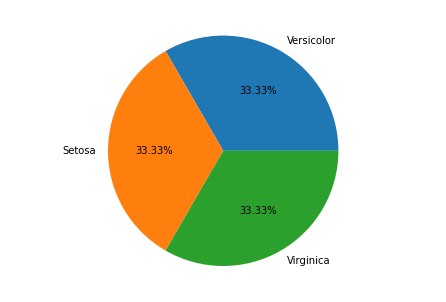

In [129]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f010eeaea10>]],
      dtype=object)

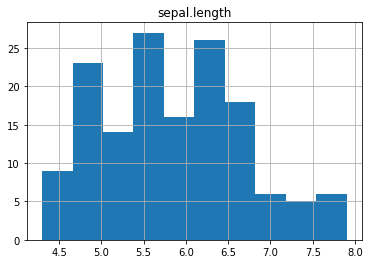

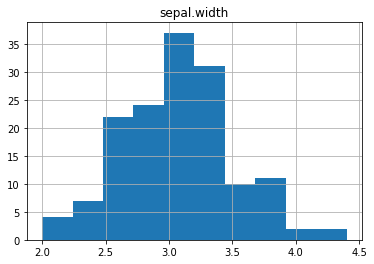

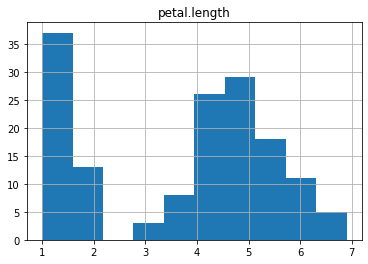

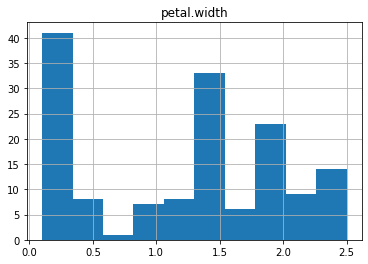

In [130]:
iris.hist('sepal.length')
iris.hist('sepal.width')
iris.hist('petal.length')
iris.hist('petal.width')

In [131]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [132]:
train, test = train_test_split(iris, test_size = 0.25)
print(train.shape)
print(test.shape)

(112, 5)
(38, 5)


In [133]:
train_X = train[['sepal.length', 'sepal.length', 'petal.length','petal.width']]
train_y = train.variety

test_X = test[['sepal.length', 'sepal.length', 'petal.length','petal.width']]
test_y = test.variety

In [134]:
train_X.head()

,sepal.length,sepal.length,petal.length,petal.width
81,5.5,5.5,3.7,1.0
85,6.0,6.0,4.5,1.6
42,4.4,4.4,1.3,0.2
2,4.7,4.7,1.3,0.2
52,6.9,6.9,4.9,1.5


In [135]:
#Using LogisticRegression
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
accuracy1=metrics.accuracy_score(prediction,test_y)
print(accuracy1)
print('Accuracy:',metrics.accuracy_score(prediction,test_y))


0.9736842105263158
Accuracy: 0.9736842105263158


In [136]:
#Confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
confusion_mat = confusion_matrix(test_y,prediction)
print("Confusion matrix: \n",confusion_mat)
print(classification_report(test_y,prediction))

Confusion matrix: 
 [[12  0  0]
 [ 0 12  1]
 [ 0  0 13]]
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        12
  Versicolor       1.00      0.92      0.96        13
   Virginica       0.93      1.00      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [137]:
#Using Support Vector
from sklearn.svm import SVC
model1 = SVC()
model1.fit(train_X,train_y)

pred_y = model1.predict(test_X)

from sklearn.metrics import accuracy_score
accuracy2=accuracy_score(test_y,pred_y)
print (accuracy2)
print("Acc=",accuracy_score(test_y,pred_y))

0.9736842105263158
Acc= 0.9736842105263158


In [138]:
#Using KNN Neighbors
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(train_X,train_y)
y_pred2 = model2.predict(test_X)

from sklearn.metrics import accuracy_score
accuracy3=accuracy_score(test_y,y_pred2)
print(accuracy3)
print("Accuracy Score:",accuracy_score(test_y,y_pred2))

1.0
Accuracy Score: 1.0


In [139]:
#Using GaussianNB
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(train_X,train_y)
y_pred3 = model3.predict(test_X)

from sklearn.metrics import accuracy_score
accuracy4=accuracy_score(test_y,y_pred3)
print(accuracy4)
print("Accuracy Score:",accuracy_score(test_y,y_pred3))

0.9736842105263158
Accuracy Score: 0.9736842105263158


In [140]:
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(train_X,train_y)
y_pred4 = model4.predict(test_X)

from sklearn.metrics import accuracy_score
accuracy5=accuracy_score(test_y,y_pred4)
print(accuracy5)
print("Accuracy Score:",accuracy_score(test_y,y_pred4))

0.9473684210526315
Accuracy Score: 0.9473684210526315


In [141]:
#USILNG random forest classifier 
from sklearn.ensemble import RandomForestClassifier 
clfr= RandomForestClassifier(random_state = 100)

# Performing training 

clfr.fit(train_X, train_y)

#making prediction 

Y_pred=clfr.predict(test_X)
accuracy6= metrics.accuracy_score(test_y, Y_pred)
print("Accuracy:",metrics.accuracy_score(test_y, Y_pred))

Accuracy: 0.9736842105263158


In [142]:
results = pd.DataFrame({'Model': ['Logistic Regression','Support Vector Machines', 'Naive Bayes','KNN' ,
                                  'Decision Tree'],'Score': [accuracy1,accuracy2, accuracy3, 
                                                                            accuracy4, accuracy5]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
1.000000,Naive Bayes
0.973684,Logistic Regression
0.973684,Support Vector Machines
0.973684,KNN
0.947368,Decision Tree
